In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [0]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


In [0]:
pip install --upgrade tensorflow

     |████████████████████████████████| 86.3MB 38kB/s 
     |████████████████████████████████| 450kB 51.3MB/s 
     |████████████████████████████████| 3.8MB 49.0MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=15,
                                   vertical_flip=True,
                                   fill_mode='reflect',
                                   data_format='channels_last',
                                   brightness_range=[0.5, 1.5],
                                   featurewise_center=True,
                                   featurewise_std_normalization=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/disease_dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/disease_dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 40 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [0]:
history = classifier.fit_generator(training_set,
                         samples_per_epoch = 128,
                         nb_epoch = 50,
                         validation_data = test_set,
                         nb_val_samples = 59)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=4, epochs=50, validation_steps=59)`
  """




Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '







4/4 [==============================] - 17s 4s/step - loss: 0.9104 - acc: 0.5275 - val_loss: 0.6942 - val_acc: 0.5000
Epoch 2/50
4/4 [==============================] - 6s 2s/step - loss: 0.7034 - acc: 0.4625 - val_loss: 0.6813 - val_acc: 0.7500
Epoch 3/50
4/4 [==============================] - 6s 2s/step - loss: 0.6905 - acc: 0.5363 - val_loss: 0.6779 - val_acc: 0.5000
Epoch 4/50
4/4 [==============================] - 6s 2s/step - loss: 0.6901 - acc: 0.5188 - val_loss: 0.6663 - val_acc: 0.5000
Epoch 5/50
4/4 [==============================] - 6s 2s/step - loss: 0.6914 - acc: 0.4437 - val_loss: 0.6259 - val_acc: 0.5000
Epoch 6/50
4/4 [==============================] - 6s 2s/step - loss: 0.6856 - acc: 0.6238 - val_loss: 0.6124 - val_acc: 0.5000
Epoch 7/50
4/4 [==============================] - 6s 2s/step - loss: 0.6785 - acc: 0.4725 - val_loss: 0.5760 - val_acc: 0.5000
Epoch 8/50
4/4 [==============================] - 6s 2s/step - loss: 0.6682 - acc: 0.5725 - val_loss: 0.5078 - val_a

Text(0.5, 0, 'Epoch')

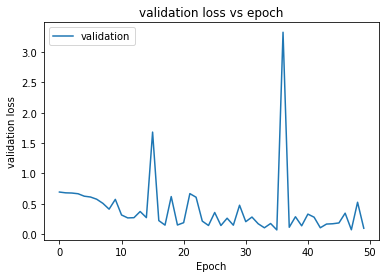

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(history.history['val_loss'])
plt.legend(['validation'], loc='upper left')
plt.title('validation loss vs epoch')
plt.ylabel('validation loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

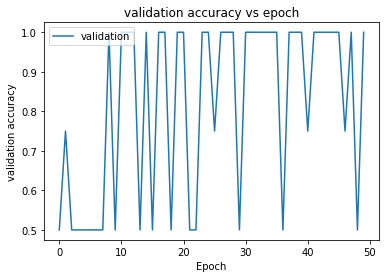

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(history.history['val_acc'])
plt.legend(['validation'], loc='upper left')
plt.title('validation accuracy vs epoch')
plt.ylabel('validation accuracy')
plt.xlabel('Epoch')

In [0]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/gdrive/My Drive/disease_dataset/test/diseased/image 021.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'diseased'
else:
  prediction = 'diseased_free'

In [31]:
if result[0][0] == 1:
  prediction = 'diseased'
  print('diseased')
else:
  prediction = 'diseased_free'
  print('not diseased')
result

diseased


array([[1.]], dtype=float32)